# Practice Project - Data Analytics for Insurance Cost Data Set
## Setup

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [5]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
df = pd.read_csv(filepath, header=None)

In [6]:
df.head()

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


# Task 1: Import the dataset

Import the dataset into a pandas dataframe. Note that three are currently no headers in the CSV file.
Print the first 10 rows.

In [21]:
df = pd.read_csv(filepath,header=None)
df.head(10)

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


Add the headers 'age','gender','bmi','no_of_children','smoker','region','charges'

In [22]:
headers = ['age','gender','bmi','no_of_children','smoker','region','charges']
df.columns = headers

In [23]:
# Replace '?' entries with 'NaN' values.
df.replace('?',np.nan,inplace=True)

In [31]:
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


# Task 2: Data Wrangling

Use dataframe.info() to identify the columns that have some NaN information. (Null)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


Handle missing data:

- For continuous attributes (e.g., age), replace missing values with the mean.
- For categorical attributes (e.g., smoker), replace missing values with the most frequent value.
- Update the data types of the respective columns.
- Verify the update using `df.info()`.


In [40]:
# smoker is a categorical attribute, replace with the most frequent entry
is_smoker = df['smoker'].value_counts().idxmax()
df['smoker'].replace(np.nan,is_smoker,inplace=True)

# age is a continuous variable, replace with mean age
mean_age = df['age'].astype(float).mean(axis=0)
df['age'].replace(np.nan,mean_age,inplace=True)

# Update the data types
df[['age','smoker']] = df[['age','smoker']].astype('int')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int64  
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int64  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB
None


Also note, that the `charges` column has values which are more than 2 decimal places long. Update the `charges` column such that all values are rounded to nearest 2 decimal places. Verify conversion by printing the first 5 values of the updated dataframe.


In [43]:
df[['charges']] = np.round(df[['charges']],2)
print(df.head())

   age  gender     bmi  no_of_children  smoker  region   charges
0   19       1  27.900               0       1       3  16884.92
1   18       2  33.770               1       0       4   1725.55
2   28       2  33.000               3       0       4   4449.46
3   33       2  22.705               0       0       1  21984.47
4   32       2  28.880               0       0       1   3866.86


# Task 3: Explanatory Data Analysis (EDA)

Implement the regression plot for charges with respect to bmi.

(0.0, 66902.85800000001)

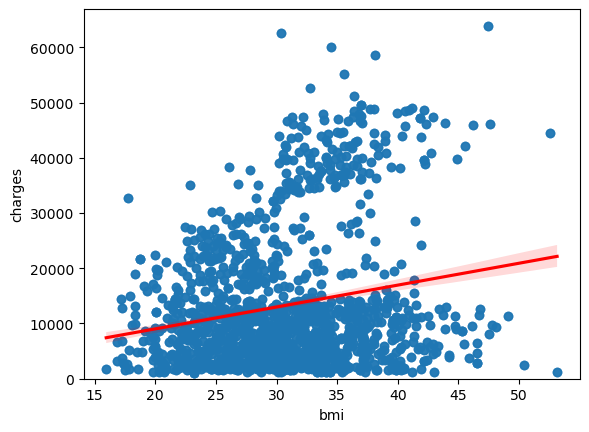

In [47]:
sns.regplot(x='bmi',y='charges',data=df,line_kws={"color":"red"})
plt.ylim(0,)

Implement the box plot for charges with respect to smoker

(0.0, 66902.85800000001)

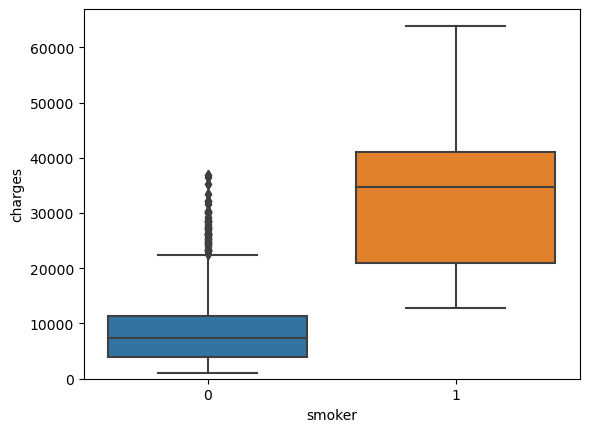

In [51]:
sns.boxplot(x='smoker',y='charges',data=df)
plt.ylim(0,)

Print the correlation matrix for the dataset.

In [53]:
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026046,0.113048,0.037574,-0.023286,-0.007167,0.298624
gender,-0.026046,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
bmi,0.113048,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
no_of_children,0.037574,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
smoker,-0.023286,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
region,-0.007167,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
charges,0.298624,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


# Task 4: Model Development

Fit a linear regression model that may be used to predict the charges value, just by using the smoker attribute of the dataset. Print the R^2 score of this model.

In [59]:
lr = LinearRegression()
X = df[['smoker']]
Y = df['charges']
lr.fit(X,Y)
print("The R-squared is:",lr.score(X,Y))

The R-squared is: 0.6221791733924185


Fit a linear regression model that may be used to predict the charges value, just by using all other attributes of the dataset. Print the R^2 score of this model. You should see an improvement in the performance.

In [65]:
Z = df[['age','gender','bmi','no_of_children','smoker','region']]
lr.fit(Z,Y)
print("R-squared is better with an score of:",lr.score(Z,Y))

R-squared is better with an score of: 0.7504083820289634


Create a training pipeline that uses `StandardScaler()`, `PolynomialFeatures()` and `LinearRegression()` to create a model that can predict the `charges` value using all the other attributes of the dataset. There should be even further improvement in the performance.


In [72]:
Input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures()),('model',LinearRegression())]
pipe = Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe = pipe.predict(Z)
print(r2_score(Y,ypipe))

0.8452285912902487


# Task 5: Model Refinement

Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.

In [76]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(Z,Y,train_size=0.2,random_state=0)

Initialize a Ridge regressor that used hyperparameter $ \alpha = 0.1 $. Fit the model using training data subset. Print the $ R^2 $ score for the testing data.

In [80]:
# x_train, x_test, y_train, y_test hold same values as in previous cells
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train,y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.7549795511489508


Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the $ R^2 $ score for the testing subset.


In [83]:
# x_train, x_test, y_train, y_test hold same values as in previous cells
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr,y_train)
y_hat=RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.8464506798336924
